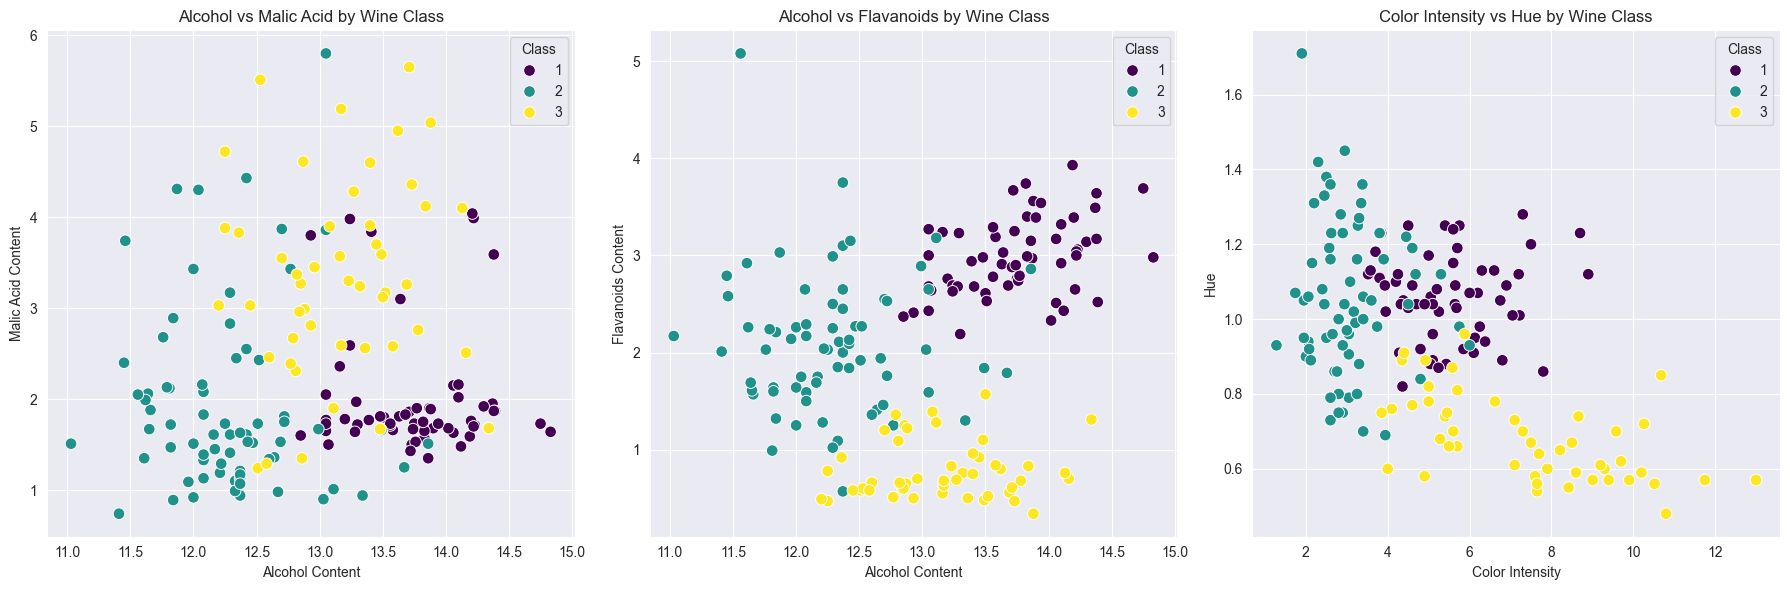

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64
Metric: euclidean, k: 1, Accuracy: 0.9444
Metric: euclidean, k: 3, Accuracy: 0.9444

Confusion Matrix (k=3, euclidean):
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

Metric: euclidean, k: 5, Accuracy: 0.9444
Metric: euclidean, 

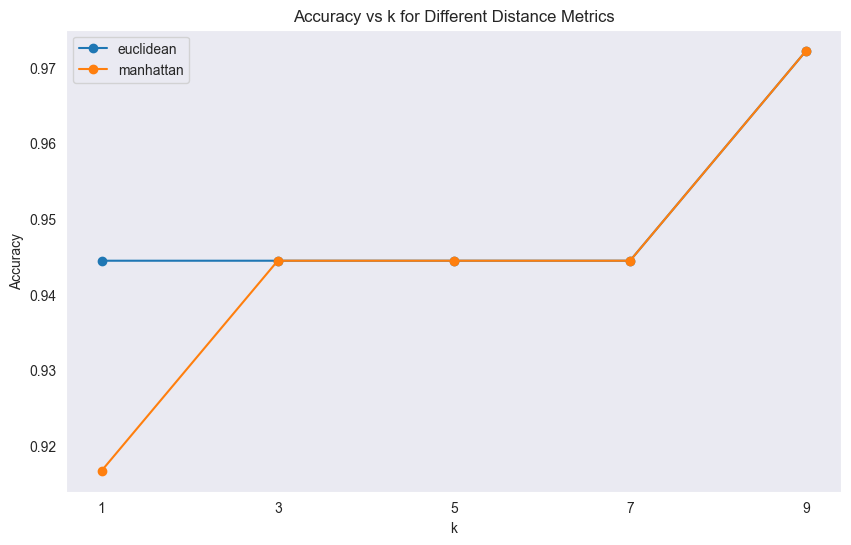

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report

# inseting data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']
wine_data = pd.read_csv(url, header=None, names=column_names)

# Creating a figure with 3 subplots
plt.figure(figsize=(18, 6))

# Plot 1: Alcohol vs Malic acid
plt.subplot(1, 3, 1)
sns.scatterplot(data=wine_data, x='Alcohol', y='Malic acid', hue='Class', palette='viridis', s=70)
plt.title('Alcohol vs Malic Acid by Wine Class')
plt.xlabel('Alcohol Content')
plt.ylabel('Malic Acid Content')

# Plot 2: Alcohol vs Flavanoids
plt.subplot(1, 3, 2)
sns.scatterplot(data=wine_data, x='Alcohol', y='Flavanoids', hue='Class', palette='viridis', s=70)
plt.title('Alcohol vs Flavanoids by Wine Class')
plt.xlabel('Alcohol Content')
plt.ylabel('Flavanoids Content')

# Plot 3: Color intensity vs Hue
plt.subplot(1, 3, 3)
sns.scatterplot(data=wine_data, x='Color intensity', y='Hue', hue='Class', palette='viridis', s=70)
plt.title('Color Intensity vs Hue by Wine Class')
plt.xlabel('Color Intensity')
plt.ylabel('Hue')

plt.tight_layout()
plt.show()


# Checking missing values
print(wine_data.isnull().sum())

# Normalizing the features except class
features = wine_data.drop('Class', axis=1)
labels = wine_data['Class']

# Min-Max normalization
normalized_features = (features - features.min()) / (features.max() - features.min())

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels,
                                                   test_size=0.2, random_state=42)


class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X.values]
        return np.array(predictions)

    def _predict(self, x):
        # Calculating distances
        if self.distance_metric == 'euclidean':
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train.values]
        elif self.distance_metric == 'manhattan':
            distances = [self._manhattan_distance(x, x_train) for x_train in self.X_train.values]

        # Getting k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train.iloc[i] for i in k_indices]

        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def _manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.sum(predictions == y.values) / len(y)


    # Testing different k values and distance metrics
k_values = [1, 3, 5, 7, 9]
metrics = ['euclidean', 'manhattan']
results = {}

for metric in metrics:
    accuracies = []
    for k in k_values:
        knn = KNN(k=k, distance_metric=metric)
        knn.fit(X_train, y_train)
        accuracy = knn.accuracy(X_test, y_test)
        accuracies.append(accuracy)
        print(f'Metric: {metric}, k: {k}, Accuracy: {accuracy:.4f}')

        # Generating confusion matrix and classification report for k=3
        if k == 3:
            predictions = knn.predict(X_test)
            print(f"\nConfusion Matrix (k=3, {metric}):")
            print(confusion_matrix(y_test, predictions))
            print("\nClassification Report:")
            print(classification_report(y_test, predictions))

    results[metric] = accuracies

# Plotting accuracy vs k
plt.figure(figsize=(10, 6))
for metric, accuracies in results.items():
    plt.plot(k_values, accuracies, label=metric, marker='o')

plt.title('Accuracy vs k for Different Distance Metrics')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()


